# Całkowanie

Całkowanie jest to operacja odwrotna do różniczkowania. Podstawowe twierdzenie rachunku różniczkowego i całkowego mówi

$$
\int_a^b f'(x) dx = f(b) - f(a)
$$

Mówiąc operacyjnie, aby obliczyć całkę z pewnej funkcji $f(x)$ musimy znaleźć funkcję $F(x)$ taką, że $F'(x) = f(x)$.
Istnieje wiele twierdzeń, które pozwalają na obliczanie całek, ale nie zawsze jest to możliwe, dlatego istnieją różne metody numeryczne, które pozwalają na obliczanie całek w sposób przybliżony.


WWW: https://pl.wikipedia.org/wiki/Ca%C5%82ka

Wykorzystajmy bibliotekę sympy do obliczenia całek dla następujących funkcji:
* $sin(x)$
* $exp(x)$
* $sin(x)*exp(x)$
* $x**2$
* $1/x$
* $sqrt(x)$
* $sqrt(1-x**2)$
  

In [1]:
import sympy as sp
from IPython.display import display

# Aktywowanie wyświetlania LaTeX
sp.init_printing(use_latex='mathjax')

# Definicja symboli
x = sp.symbols('x')

# Definicja funkcji
f = [sp.sin(x), sp.exp(x), sp.sin(x)*sp.exp(x), x**2, 1/x, sp.sqrt(x), sp.sqrt(1-x**2)]

# Obliczenie całek i wyświetlanie w formacie LaTeX
for fun in f:
    F = sp.integrate(fun, x)
    display(sp.Eq(sp.Integral(fun, x), F, evaluate=False))


⌠                    
⎮ sin(x) dx = -cos(x)
⌡                    

⌠           
⎮  x       x
⎮ ℯ  dx = ℯ 
⌡           

⌠                 x           x       
⎮  x             ℯ ⋅sin(x)   ℯ ⋅cos(x)
⎮ ℯ ⋅sin(x) dx = ───────── - ─────────
⌡                    2           2    

⌠          3
⎮  2      x 
⎮ x  dx = ──
⌡         3 

⌠              
⎮ 1            
⎮ ─ dx = log(x)
⎮ x            
⌡              

             3/2
⌠         2⋅x   
⎮ √x dx = ──────
⌡           3   

⌠                       ________          
⎮    ________          ╱      2           
⎮   ╱      2       x⋅╲╱  1 - x     asin(x)
⎮ ╲╱  1 - x   dx = ───────────── + ───────
⌡                        2            2   

## Całki wielokrotne

Całki wielokrotne są zdefiniowane jako całki z funkcji wielu zmiennych. W przypadku całek podwójnych mamy do czynienia z całkowaniem funkcji dwóch zmiennych po obszarze w przestrzeni dwuwymiarowej. W przypadku całek potrójnych mamy do czynienia z całkowaniem funkcji trzech zmiennych po obszarze w przestrzeni trójwymiarowej.

Rozpatrzmy przykład całki podwójnej funkcji $f(x,y) = x*y$ po obszarze $[0,1] \times [0,1]$.

$$
\int_0^1 \int_0^1 x*y dy dx
$$

Interpretacja graficzna całki podwójnej polega na obliczeniu objętości ciała ograniczonego funkcją $f(x,y)$ oraz obszarem całkowania.

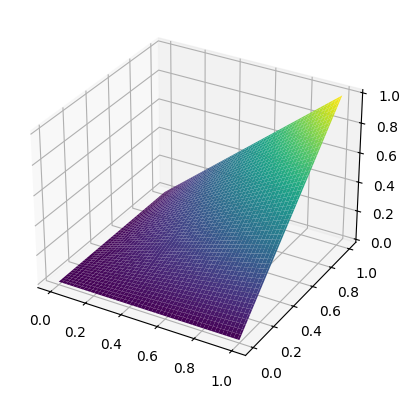

In [2]:
# Po pierwsze narysujmy obszar całkowania
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = X*Y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


In [3]:
# Obliczmy całkę podwójną
import sympy as sp

x, y = sp.symbols('x y')
f = x*y
    
F = sp.integrate(sp.integrate(f, (y, 0, 1)), (x, 0, 1))
F

1/4

## Moment bezwładności jako całka potrójna

Dla bryły o ciągłej zmiennej gęstości $\rho(x, y, z)$, gdzie $\rho$ to gęstość masy per jednostka objętości, moment bezwładności $I_z$ względem osi $Oz$ można wyrazić jako:

$$
I_z = \int_V \rho(x, y, z) \cdot (x^2 + y^2) \,dV
$$

gdzie $dV$ to elementarny element objętości bryły, a całkowanie odbywa się po całej objętości $V$ bryły. Warto zauważyć, że $(x^2 + y^2)$ jest kwadratem odległości punktu masowego od osi $Oz$, co odpowiada definicji momentu bezwładności.


WWW: https://pl.wikipedia.org/wiki/Moment_bezw%C5%82adno%C5%9Bci

In [4]:
# Obliczmy moment bezwładności walca o promieniu R i wysokości H względem osi OZ
import sympy as sp

r, phi, z = sp.symbols('r phi z')
R, H = sp.symbols('R H', positive=True)
dm = r
Iz = sp.integrate(sp.integrate(sp.integrate(r**2 * dm, (r, 0, R)), (phi, 0, 2*sp.pi)), (z, 0, H))
Iz

     4
π⋅H⋅R 
──────
  2   

In [5]:
# Pamiętając o tym, że masa walca równa jest objętości walca pomnożonej przez gęstość masy czyli M = V * rho = pi * R**2 * H * rho
# Możemy zapisać moment bezwładności względem osi OZ jako
M = sp.symbols('M', positive=True)
Iz.subs(sp.pi * R**2 * H, M)

   2
M⋅R 
────
 2  

# Długość krzywej jako całka

Długość krzywej $y = f(x)$ między dwoma punktami $x_1$ i $x_2$ jest dana wzorem:

$$
L = \int_{x_1}^{x_2} \sqrt{1 + (f'(x))^2} dx
$$


In [6]:
# Obliczmy długość krzywej y = \sqrt{R^2 - x^2} dla x z przedziału [-R, R]
x = sp.symbols('x')
R = sp.symbols('R', positive=True)
f = sp.sqrt(R**2 - x**2)
L = sp.integrate(sp.sqrt(1 + sp.diff(f, x)**2), (x, -R, R))
L

π⋅R

In [7]:
# Długość krzywej dla f(x)=x^3 na przedziale [0, a]

# Definiowanie symboli
x, a = sp.symbols('x a', real=True, positive=True)

# Funkcja
f = x**2

# Obliczanie długości krzywej
L = sp.integrate(sp.sqrt(1 + sp.diff(f, x)**2), (x, 0, a))
L

     __________             
    ╱    2                  
a⋅╲╱  4⋅a  + 1    asinh(2⋅a)
─────────────── + ──────────
       2              4     

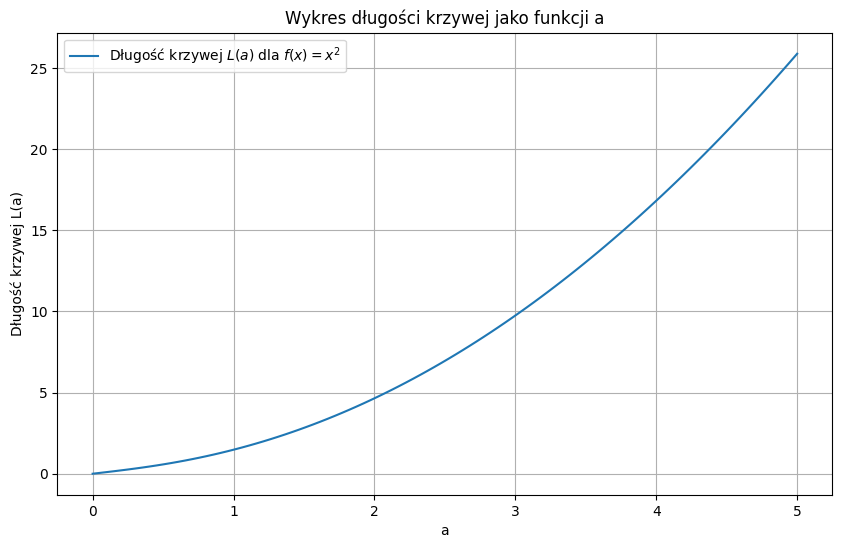

In [8]:
# Przekształcanie symbolicznego wyniku na funkcję numeryczną
L_func = sp.lambdify(a, L, 'numpy')

# Zakres wartości dla a
a_values = np.linspace(0, 5, 100)

# Obliczanie wartości L dla różnych wartości a
L_values = L_func(a_values)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(a_values, L_values, label=f'Długość krzywej $L(a)$ dla $f(x)=x^2$')
plt.title('Wykres długości krzywej jako funkcji a')
plt.xlabel('a')
plt.ylabel('Długość krzywej L(a)')
plt.legend()
plt.grid(True)
plt.show()